In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
archivo = "./StudentPerformanceFactors.csv"
student_performance = pd.read_csv(archivo)
student_performance.shape

(6607, 20)

In [3]:
student_performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
student_performance.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## 🔍 Variables con Datos Faltantes

Las siguientes variables contienen datos faltantes:
- **Distance_from_Home**
- **Parental_Education_Level**
- **Teacher_Quality**

> También se observa que la variable **Exam_Score** tiene un valor inusual de 101. Se procederá a realizar una limpieza de estos datos.

In [6]:
print(student_performance["Distance_from_Home"].value_counts(dropna=False),"\n")
print(student_performance["Parental_Education_Level"].value_counts(dropna=False),"\n")
print(student_performance["Teacher_Quality"].value_counts(dropna=False))

Distance_from_Home
Near        3884
Moderate    1998
Far          658
NaN           67
Name: count, dtype: int64 

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
NaN               90
Name: count, dtype: int64 

Teacher_Quality
Medium    3925
High      1947
Low        657
NaN         78
Name: count, dtype: int64


In [7]:
student_performance["Teacher_Quality"] = student_performance["Teacher_Quality"].fillna("Medium")
student_performance["Parental_Education_Level"] = student_performance["Parental_Education_Level"].fillna("High School")
student_performance["Distance_from_Home"] = student_performance["Distance_from_Home"].fillna("Moderate")
student_performance["Exam_Score"] = student_performance["Exam_Score"].replace(101,100)

In [8]:
student_performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 📊 Hipótesis #1

**Si la calidad del profesor es alta, la nota promedio de los alumnos aumentará.**

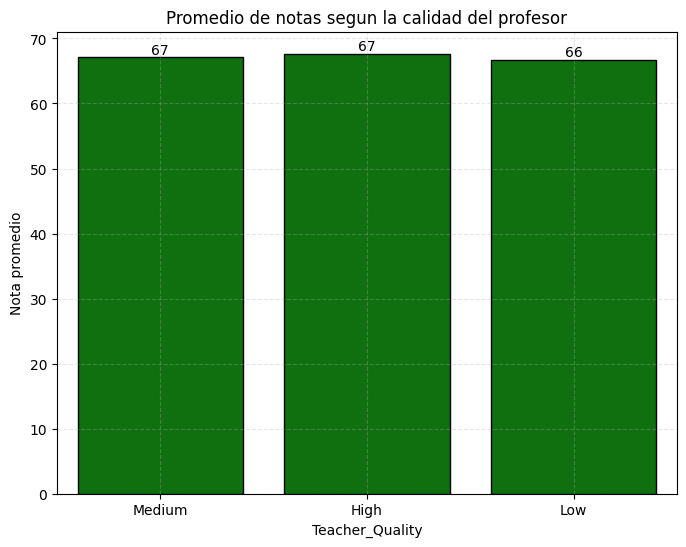

In [9]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=student_performance, x="Teacher_Quality", y="Exam_Score",estimator="mean", errorbar=None ,color="green",edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
plt.title("Promedio de notas segun la calidad del profesor")
plt.ylabel("Nota promedio")
plt.grid(linestyle="--",alpha=0.30)

plt.show()

### 📌 Conclusión

Se concluye que la nota no se ve influenciada por la calidad del profesor.

## 📊 Hipótesis #2

**A mayor cantidad de horas de estudio semanales, mayor será la nota promedio en los exámenes.**

Correlacion entre la nota del examen y horas de estudio semanal: 0.45


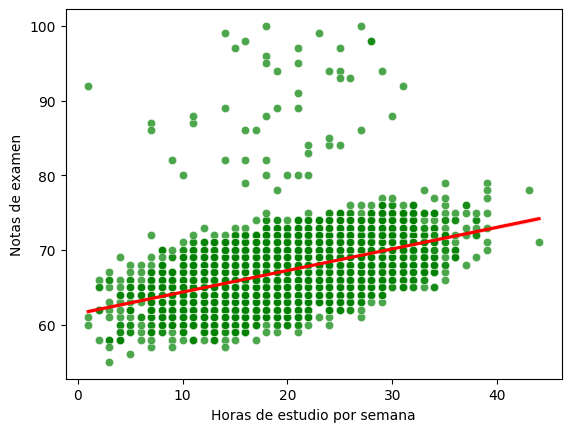

In [10]:
correlacion = student_performance["Exam_Score"].corr(student_performance["Hours_Studied"])
print(f"Correlacion entre la nota del examen y horas de estudio semanal: {correlacion:.2f}")
sns.scatterplot(data=student_performance,x="Hours_Studied",y="Exam_Score",alpha=0.7, color="green")
sns.regplot(data=student_performance,x="Hours_Studied",y="Exam_Score",scatter=False, color="red" )
plt.xlabel("Horas de estudio por semana")
plt.ylabel("Notas de examen")
plt.show()

### 📌 Conclusión

Existe una correlación moderada positiva entre las horas de estudio semanales y la nota del examen. Por lo tanto, se puede concluir que las horas de estudio semanales influyen moderadamente en la nota.

## 📊 Hipótesis #3

**Los alumnos que asisten más a clases tienen mejores notas.**

Correlacion entre la nota de examen y el porcentaje de asistencia: 0.58


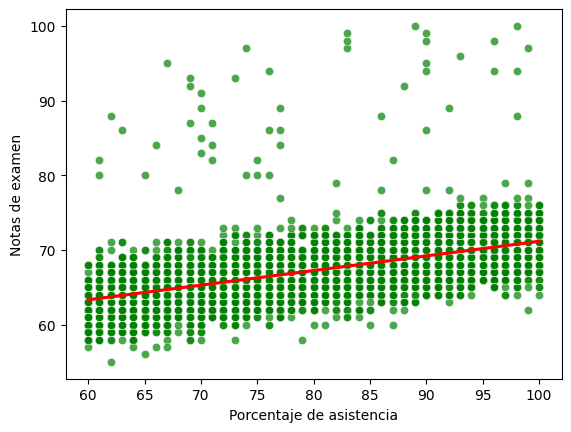

In [11]:
correlacion = student_performance["Exam_Score"].corr(student_performance["Attendance"])
print(f"Correlacion entre la nota de examen y el porcentaje de asistencia: {correlacion:.2f}")
sns.scatterplot(data=student_performance,x="Attendance",y="Exam_Score",alpha=0.7, color="green")
sns.regplot(data=student_performance,x="Attendance",y="Exam_Score",scatter=False, color="red" )
plt.xlabel("Porcentaje de asistencia")
plt.ylabel("Notas de examen")
plt.show() 

### 📌 Conclusión

Existe una correlación moderada positiva entre el porcentaje de asistencia y la nota. Por lo tanto, se puede concluir que la asistencia a clases influye moderadamente en la nota.

## 📊 Hipótesis #4

**Los estudiantes con acceso a recursos educativos tienen mejores notas promedio.**

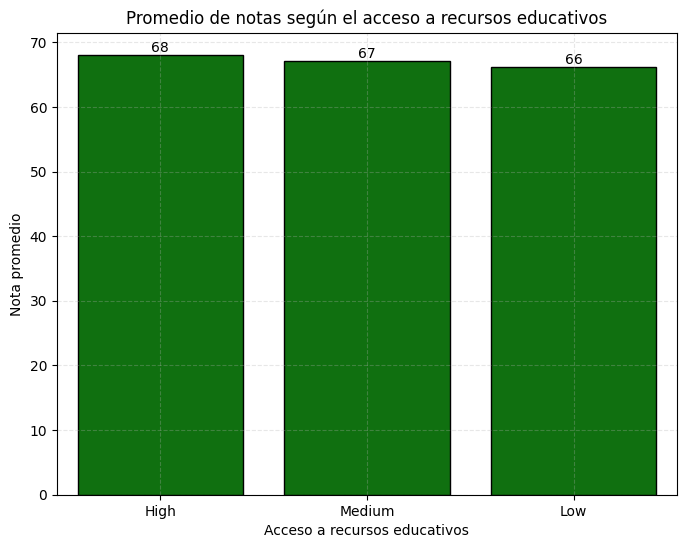

In [12]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=student_performance, x="Access_to_Resources", y="Exam_Score", estimator="mean", errorbar=None, color="green", edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()), xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), ha="center", va="bottom", fontsize=10, color="black")
plt.title("Promedio de notas según el acceso a recursos educativos")
plt.ylabel("Nota promedio")
plt.xlabel("Acceso a recursos educativos")
plt.grid(linestyle="--", alpha=0.30)
plt.show()

### 📌 Conclusión

Se llega a la conclusión de que el acceso a recursos educativos no parece tener un impacto significativo en el promedio de las notas de los estudiantes.

## 📊 Hipótesis #5

**Los alumnos en escuelas privadas tienen notas promedio más altas que los alumnos de escuelas públicas.**

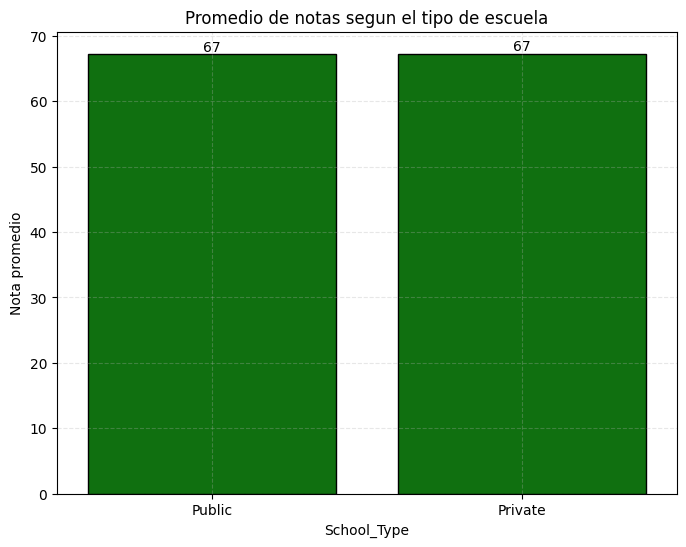

In [13]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=student_performance, x="School_Type", y="Exam_Score",estimator="mean", errorbar=None ,color="green",edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
plt.title("Promedio de notas segun el tipo de escuela")
plt.ylabel("Nota promedio")
plt.grid(linestyle="--",alpha=0.30)
plt.show()

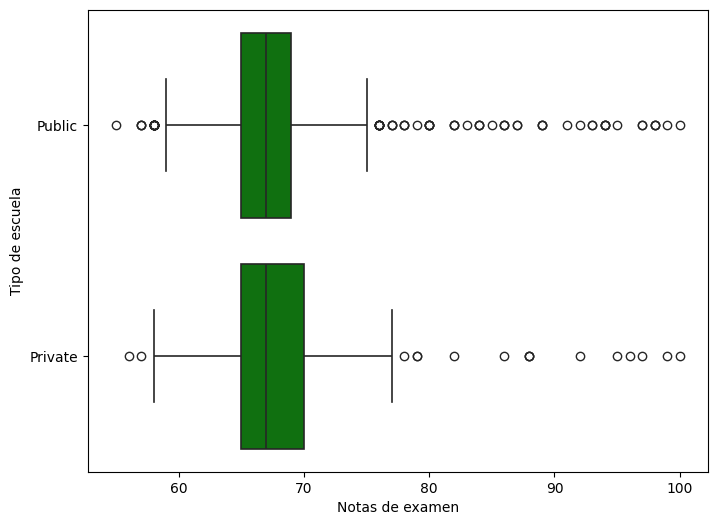

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data=student_performance, x="Exam_Score", y="School_Type",color="green",linewidth=1.2)
plt.xlabel("Notas de examen")
plt.ylabel("Tipo de escuela")
plt.show()

In [15]:
print("Estadisticas de las notas de las escuelas publicas")
print(student_performance.loc[student_performance["School_Type"] == "Public"]["Exam_Score"].describe())
print("Estadisticas de las notas de las escuelas privadas")
print(student_performance.loc[student_performance["School_Type"] == "Private"]["Exam_Score"].describe())

Estadisticas de las notas de las escuelas publicas
count    4598.000000
mean       67.212701
std         3.906844
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64
Estadisticas de las notas de las escuelas privadas
count    2009.000000
mean       67.287705
std         3.848844
min        56.000000
25%        65.000000
50%        67.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64


### 📌 Conclusión

Se observa que:

1. La nota promedio de los estudiantes de escuelas privadas y públicas es prácticamente la misma.
2. Las notas de las escuelas privadas están levemente más dispersas que las de las escuelas públicas.
3. Tanto las escuelas públicas como privadas tienen valores atípicos.

Por lo tanto, según lo analizado, el tipo de escuela no influye significativamente en la nota obtenida.

## 🔍 Analisis de los outliers
Para este analisis no voy a discriminar por tipo de escuela

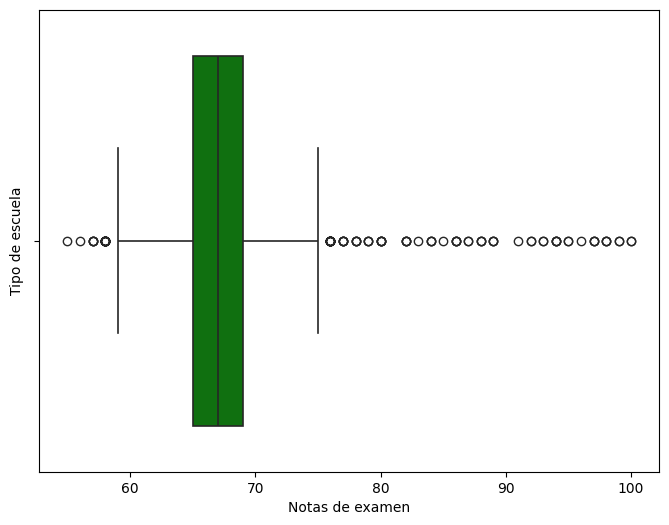

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=student_performance, x="Exam_Score",color="green",linewidth=1.2)
plt.xlabel("Notas de examen")
plt.ylabel("Tipo de escuela")
plt.show()

In [17]:
from scipy import stats
iqr = stats.iqr(student_performance["Exam_Score"])
limite_inferior = student_performance["Exam_Score"].quantile(0.25) - 1.5*iqr
limite_superior = student_performance["Exam_Score"].quantile(0.75) + 1.5*iqr


In [18]:
student_performance.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235508
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.889161
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,100.000000


In [19]:
# Voy a analizar los outliers
print(f"Limite inferior: {limite_inferior}")
print(f"Cantidad de outliers inferiores: {student_performance[student_performance['Exam_Score'] < limite_inferior].shape[0]}")
student_performance.loc[student_performance["Exam_Score"] < limite_inferior].describe()

Limite inferior: 59.0
Cantidad de outliers inferiores: 28


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,8.214286,64.107143,7.071429,67.750000,0.607143,2.214286,57.678571
std,4.573330,4.589354,1.274495,11.097631,0.831745,0.994695,0.722832
min,2.000000,60.000000,5.000000,51.000000,0.000000,0.000000,55.000000
25%,4.000000,61.000000,6.000000,61.750000,0.000000,2.000000,58.000000
50%,8.000000,62.500000,7.000000,67.000000,0.000000,2.000000,58.000000
75%,12.250000,66.250000,8.000000,73.750000,1.000000,3.000000,58.000000
max,17.000000,79.000000,10.000000,93.000000,3.000000,4.000000,58.000000


In [ ]:
print(f"Limite inferior: {limite_superior}")
print(f"Cantidad de outliers superiores: {student_performance[student_performance['Exam_Score'] > limite_superior].shape[0]}")
student_performance.loc[student_performance["Exam_Score"] > limite_superior].describe()

Limite inferior: 75.0
Cantidad de outliers superiores: 76


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,23.947368,84.434211,6.921053,76.171053,1.907895,2.815789,84.907895
std,8.567994,12.278258,1.421390,15.988653,1.642580,1.139714,8.051795
min,1.000000,61.000000,4.000000,52.000000,0.000000,0.000000,76.000000
25%,18.000000,73.750000,6.000000,59.750000,1.000000,2.000000,77.000000
50%,24.500000,88.500000,7.000000,76.500000,2.000000,3.000000,83.500000
75%,30.000000,96.000000,8.000000,91.000000,2.250000,3.250000,92.250000
max,43.000000,100.000000,10.000000,100.000000,6.000000,5.000000,100.000000
